# Exploration of YouTube Streams and Pitchfork Reviews

In [25]:
import boto3
from boto3.dynamodb.conditions import Key, Attr
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby
import collections
import pandas as pd

In [26]:
dynamodb = boto3.resource('dynamodb')

table = dynamodb.Table("pitchfork_reviews")

response = table.scan(
        FilterExpression=Attr('albumReleaseYear').lt(3000)
)

data = []
data.extend(response['Items'])

# get all data
while 'LastEvaluatedKey' in response:
  try:
    response = table.scan(
          ExclusiveStartKey=response['LastEvaluatedKey'],
          FilterExpression=Attr('albumReleaseYear').lt(3000)
    )
    data.extend(response['Items'])
  except:
    print("sleeping...")
    sleep(30)


In [27]:
df = pd.DataFrame(data)

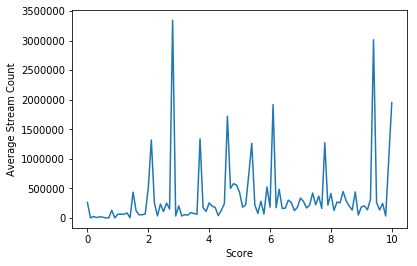

rating
0.0     2.611773e+05
0.1     7.300000e+01
0.2     2.250550e+04
0.3     6.654000e+03
0.4     1.840600e+04
0.5     1.311850e+04
0.6     3.590000e+02
0.7     1.050000e+01
0.8     1.291130e+05
0.9     1.490000e+02
1.0     6.227129e+04
1.2     6.144667e+04
1.3     8.429900e+04
1.4     4.287000e+03
1.5     4.353020e+05
1.6     1.192273e+05
1.7     5.290300e+04
1.8     5.353140e+04
1.9     6.783789e+04
2.0     5.096413e+05
2.1     1.318139e+06
2.2     2.574011e+05
2.3     3.457100e+04
2.4     2.347951e+05
2.5     1.080367e+05
2.6     2.510249e+05
2.7     1.495734e+05
2.8     3.344465e+06
2.9     3.276523e+04
3.0     2.034327e+05
3.1     3.260020e+04
3.2     5.478488e+04
3.3     4.769761e+04
3.4     9.186795e+04
3.5     7.392590e+04
3.6     6.246975e+04
3.7     1.337925e+06
3.8     1.724363e+05
3.9     1.103839e+05
4.0     2.541148e+05
4.1     1.978577e+05
4.2     1.759842e+05
4.3     3.830833e+04
4.4     1.285569e+05
4.5     2.421029e+05
4.6     1.719701e+06
4.7     5.004942e+05
4.8   

In [97]:
df['rating'] = df['rating'].astype(float) 
df['viewCount'] = df['viewCount'].astype(float) 
g = df.groupby('rating')
x = g.viewCount.describe()['mean']
plt.plot(x)
plt.xlabel('Score')
plt.ylabel('Average Stream Count')
plt.show()
print(x)

In [100]:
df[df['rating'] == 2.8]

,albumName,albumReleaseYear,artistName,artistNameAlbumName,authorName,body,genre,publishDate,rating,title,url,viewCount,ytUrl
2309,"Mumps, etc.",2012,WHY?,"WHY? - Mumps, etc.",Ian Cohen,<p>The realization that a great band has made ...,Rap,2012-10-09T06:00:01.000Z,2.8,"Mumps, etc.",/reviews/albums/17136-mumps-etc/,10244.0,https://www.youtube.com/playlist?list=PLME7G32...
4410,Razorlight,2006,Razorlight,Razorlight - Razorlight,Adam Moerder,<p>With that whole turn-of-the-century garage ...,Electronic,2006-07-21T06:00:02.000Z,2.8,Razorlight,/reviews/albums/9234-razorlight/,132856.0,https://www.youtube.com/playlist?list=PL510F12...
5071,Red Snapper,2003,Red Snapper,Red Snapper - Red Snapper,Jascha Hoffman,<p>When <em>Our Aim Is To Satisfy Red Snapper<...,Electronic,2003-04-16T05:00:00.000Z,2.8,Red Snapper,/reviews/albums/6722-red-snapper/,90770.0,https://www.youtube.com/playlist?list=PLgr2F2x...
6097,Hopes and Fears,2004,Keane,Keane - Hopes and Fears,Stephen M. Deusner,<p>I'll happily admit if I turn out to have be...,Rock,2004-08-08T06:00:01.000Z,2.8,Hopes and Fears,/reviews/albums/4581-hopes-and-fears/,215315.0,https://www.youtube.com/playlist?list=PL6pN2MN...
6115,Universal Mind Control,2008,Common,Common - Universal Mind Control,Brian Howe,<p>On a song called &quot;Announcement&quot; f...,Rap,2008-12-10T06:00:02.000Z,2.8,Universal Mind Control,/reviews/albums/12508-universal-mind-control/,10240.0,https://www.youtube.com/playlist?list=PL80F426...
6689,Beyond the Neighbourhood,2007,Athlete,Athlete - Beyond the Neighbourhood,Ian Cohen,<p>Chris Martin can't leave rap alone-- the ga...,Rock,2007-11-19T06:00:05.000Z,2.8,Beyond the Neighbourhood,/reviews/albums/10853-beyond-the-neighbourhood/,3805.0,https://www.youtube.com/playlist?list=PL508829...
7685,Divide,2017,Ed Sheeran,Ed Sheeran - Divide,Laura Snapes,"<p><a href=""http://pitchfork.com/artists/32366...",Rock,2017-03-10T06:00:00.000Z,2.8,÷,/reviews/albums/22960-divide/,38663054.0,https://www.youtube.com/playlist?list=PLjp0AEE...
8135,It's Alive,2006,The New Cars,The New Cars - It's Alive,Marc Hogan,<p>It's not uncommon for a has-been band to re...,Rock,2006-06-21T06:00:05.000Z,2.8,It's Alive,/reviews/albums/9109-its-alive/,3207.0,https://www.youtube.com/playlist?list=PLtJK_In...
8573,Shootenanny!,2003,Eels,Eels - Shootenanny!,Chris Dahlen,<p>Let's set aside that the Eels are not for e...,Electronic,2003-05-22T05:00:00.000Z,2.8,Shootenanny!,/reviews/albums/2687-shootenanny/,32367.0,https://www.youtube.com/playlist?list=PLB818EA...
8615,Live,2003,Soledad Brothers,Soledad Brothers - Live,Rob Mitchum,"<p>Oh Lord, you know I don't ask for much, but...",Rock,2003-04-10T05:00:00.000Z,2.8,Live,/reviews/albums/7321-live/,27.0,https://www.youtube.com/playlist?list=PLD4AD19...


In [101]:
df[df['rating'] == 9.4]

,albumName,albumReleaseYear,artistName,artistNameAlbumName,authorName,body,genre,publishDate,rating,title,url,viewCount,ytUrl
908,Power to the People and the Beats,2005,Public Enemy,Public Enemy - Power to the People and the Beats,Sean Fennessey,<p>There's something almost inherently wrong w...,Rap,2005-08-02T06:00:01.000Z,9.4,Power to the People and the Beats,/reviews/albums/6502-power-to-the-people-and-t...,6236.0,https://www.youtube.com/playlist?list=PLXMuW5e...
1503,American Water,1998,Silver Jews,Silver Jews - American Water,Mike Powell,"<p>I bought <a href=""http://pitchfork.com/arti...",Rock,2017-07-30T05:00:00.000Z,9.4,American Water,/reviews/albums/silver-jews-american-water/,176760.0,https://www.youtube.com/playlist?list=PLqN-Gad...
2432,Midlife: A Beginner's Guide to Blur,2009,Blur,Blur - Midlife: A Beginner's Guide to Blur,Scott Plagenhoef,"<p>At first glance, <em>Midlife</em> seems lik...",Rock,2009-07-30T06:00:00.000Z,9.4,Midlife: A Beginner's Guide to Blur,/reviews/albums/13168-midlife-a-beginners-guid...,750.0,https://www.youtube.com/playlist?list=PLlUE0Q0...
2589,The Disintegration Loops I-IV,2003,William Basinski,William Basinski - The Disintegration Loops I-IV,Joe Tangari,<p>You are slowly being destroyed. It's imperc...,Experimental,2004-04-08T05:00:00.000Z,9.4,The Disintegration Loops I-IV,/reviews/albums/577-the-disintegration-loops-i...,15943.0,https://www.youtube.com/playlist?list=PL8LYVsn...
3396,Nilsson Schmilsson,2004,Harry Nilsson,Harry Nilsson - Nilsson Schmilsson,Andy Beta,"<p>Dear Diary:</p>\n<p>Wake up, slightly dazed...",Rock,2004-02-11T06:00:03.000Z,9.4,Nilsson Schmilsson,/reviews/albums/5887-nilsson-schmilsson/,44342.0,https://www.youtube.com/playlist?list=PL0qgClm...
3983,Bridge Over Troubled Water,2011,Simon & Garfunkel,Simon & Garfunkel - Bridge Over Troubled Water,Stephen M. Deusner,"<p>Simon &amp; Garfunkel's 1970 swan song, <em...",Rock,2011-03-18T06:00:01.000Z,9.4,Bridge Over Troubled Water,/reviews/albums/15197-bridge-over-troubled-water/,75880637.0,https://www.youtube.com/playlist?list=PLagyxbJ...
4719,IV,2006,Faust,Faust - IV,Dominique Leone,"<p>Faust made (er, makes) pretty, catchy, slig...",Rock,2007-10-03T06:00:00.000Z,9.4,IV,/reviews/albums/10728-iv/,9291.0,https://www.youtube.com/playlist?list=PLJeGG6k...
4760,Black Messiah,2014,D’Angelo,D’Angelo - Black Messiah,Craig Jenkins,<p>With this week’s shock release of <em>Black...,Pop/R&B,2014-12-19T06:00:00.000Z,9.4,Black Messiah,/reviews/albums/20078-black-messiah/,3882724.0,https://www.youtube.com/playlist?list=PL4LyJBW...
5017,Legends of Country Music,2006,Bob Wills and His Texas Playboys,Bob Wills and His Texas Playboys - Legends of ...,Stephen M. Deusner,<p>It seems wholly unnecessary to note that Bo...,Folk/Country,2006-12-07T06:00:02.000Z,9.4,Legends of Country Music,/reviews/albums/9701-legends-of-country-music/,538.0,https://www.youtube.com/playlist?list=PLCxMukq...
5814,Madvillainy,2004,Madvillain,Madvillain - Madvillainy,Rollie Pemberton & Nick Sylvester,"<p><em>Madvillainy</em>, one of the most antic...",Rap,2004-03-25T06:00:02.000Z,9.4,Madvillainy,/reviews/albums/5579-madvillainy/,5022183.0,https://www.youtube.com/playlist?list=PL9dk_xt...


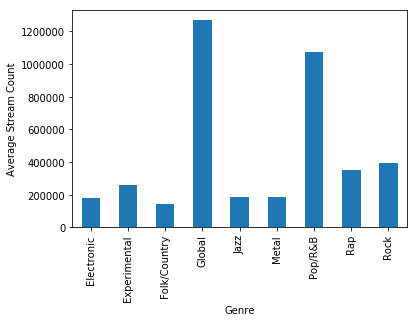

In [48]:
g = df.groupby('genre')
x = g.viewCount.describe()['mean']
x.plot.bar()
plt.xlabel('Genre')
plt.ylabel('Average Stream Count')
plt.show()

In [86]:
df.nlargest(100, 'viewCount')

,albumName,albumReleaseYear,artistName,artistNameAlbumName,authorName,body,genre,publishDate,rating,title,url,viewCount,ytUrl
8088,Collected Works,2007,A Mountain of One,A Mountain of One - Collected Works,Tim Finney,<p>It's a mark of the curiousness of A Mountai...,Pop/R&B,2007-12-03T06:00:04.000Z,7.8,Collected Works,/reviews/albums/10915-collected-works/,850678165.0,https://www.youtube.com/playlist?list=PL7XlqX4...
4669,Tralala,2005,Tralala,Tralala - Tralala,Marc Hogan,<p>The first thing you need to know about Tral...,Rock,2005-07-28T06:00:04.000Z,6.1,Tralala,/reviews/albums/8292-tralala/,359923588.0,https://www.youtube.com/playlist?list=PLiDWOof...
2192,The Beatles,2009,The Beatles,The Beatles - The Beatles,Mark Richardson,<p>In his review of the Beatles' 1963 LP debut...,Rock,2009-09-10T06:00:00.000Z,10.0,The Beatles,/reviews/albums/13432-the-beatles/,131244081.0,https://www.youtube.com/playlist?list=PLmo4pBu...
14962,Excerpts from the Broken Bone Choir,2007,American Catastrophe,American Catastrophe - Excerpts from the Broke...,Liz Colville,<p>Search this band's name on Google and you'l...,Rock,2007-07-06T06:00:05.000Z,6.3,Excerpts from the Broken Bone Choir,/reviews/albums/10372-excerpts-from-the-broken...,96263062.0,https://www.youtube.com/playlist?list=PLWvahZR...
10745,A Thousand Voices EP,2010,My Gold Mask,My Gold Mask - A Thousand Voices EP,Brian Howe,<p>It's hard to overstate the similarities bet...,Electronic,2010-05-26T06:00:04.000Z,5.9,A Thousand Voices EP,/reviews/albums/14206-a-thousand-voices-ep/,87794878.0,https://www.youtube.com/playlist?list=PLltfcKZ...
11508,as if to each other...,2015,R. Andrew Lee,R. Andrew Lee - as if to each other...,Seth Colter Walls,"<p>In recent years, pianist R. Andrew Lee has ...",Experimental,2015-07-29T06:00:04.000Z,7.4,as if to each other...,/reviews/albums/20814-as-if-to-each-other/,87794878.0,https://www.youtube.com/playlist?list=PLltfcKZ...
14671,Can't See My Own Face - The Eternal Love 2,2010,How to Dress Well,How to Dress Well - Can't See My Own Face - Th...,Zach Kelly,<p>Tom Krell is a Cologne-by-way-of-Brooklyn t...,Electronic,2010-07-12T06:00:01.000Z,8.0,Can't See My Own Face - The Eternal Love 2,/reviews/albums/14414-cant-see-my-own-face-the...,86243662.0,https://www.youtube.com/playlist?list=PLD33465...
7137,Our Way Is Revenge,2007,Shock Cinema,Shock Cinema - Our Way Is Revenge,Adam Moerder,<p>Picture the most over-the-top clique of art...,Rock,2007-09-19T06:00:05.000Z,5.4,Our Way Is Revenge,/reviews/albums/10641-our-way-is-revenge/,79899731.0,https://www.youtube.com/playlist?list=PLMWfZxj...
7537,Witch,2006,Witch,Witch - Witch,Brandon Stosuy,"<p>Forget the dog, kids: 2006 is ostensibly th...",Metal,2006-03-14T06:00:00.000Z,7.6,Witch,/reviews/albums/8808-witch/,79859083.0,https://www.youtube.com/playlist?list=PLIjU42e...
11181,Undertow,2017,Wolf Eyes,Wolf Eyes - Undertow,Zoe Camp,<p>“Time is what keeps everything from happeni...,Experimental,2017-03-31T05:00:00.000Z,7.3,Undertow,/reviews/albums/23045-wolf-eyes-undertow/,77548939.0,https://www.youtube.com/playlist?list=PL79DF4D...


Most viewed discarding bad ones:

The Beatles - The Beatles

How to Dress Well - Can't See My Own Face - The Eternal Love 2

Simon & Garfunkel - Bridge Over Troubled  Waters

Bob Marley & the Wailers - Exodus: 30th Anniversary

Ed Sheeran - Divide

In [91]:
pd.set_option('display.max_rows', 172)

df[df['genre'] == 'Global'].groupby('artistName').agg('count')

,albumName,albumReleaseYear,artistNameAlbumName,authorName,body,genre,publishDate,rating,title,url,viewCount,ytUrl
artistName,,,,,,,,,,,,
A Tribe Called Red,1,1,1,1,1,1,1,1,1,1,1,1
Amadou & Mariam,6,6,6,6,6,6,6,6,6,6,6,6
Antibalas,1,1,1,1,1,1,1,1,1,1,1,1
Antibalas Afrobeat Orchestra,2,2,2,2,2,2,2,2,2,2,2,2
Arve Henriksen,4,4,4,4,4,4,4,4,4,4,4,4
BROOKZILL!,1,1,1,1,1,1,1,1,1,1,1,1
Baaba Maal,1,1,1,1,1,1,1,1,1,1,1,1
Babatunde Olatunji,1,1,1,1,1,1,1,1,1,1,1,1
Bacao Rhythm & Steel Band,1,1,1,1,1,1,1,1,1,1,1,1
